# Some plots highlighting some funny behaviour in the f6 forecasts

In [4]:
import cftime
import numpy as np
import xarray as xr
import myfuncs as my
import matplotlib.pyplot as plt

# Parameters

In [76]:
REGION = 'TAS'
VARIABLE = 't_ref'
PERIOD = None #slice('1990','1995')

In [77]:
obsv_ds = 'awap' if VARIABLE == 'precip' else 'jra55'
obsv_ts = my.open_zarr(f'data/{obsv_ds}_{VARIABLE}_{REGION}_ts_anom.zarr.zip').compute()
obsv = my.open_zarr(f'data/{obsv_ds}_{VARIABLE}_{REGION}_anom.zarr.zip').compute()
fcst = my.open_zarr(f'data/f6_{VARIABLE}_{REGION}_anom.zarr.zip').compute()

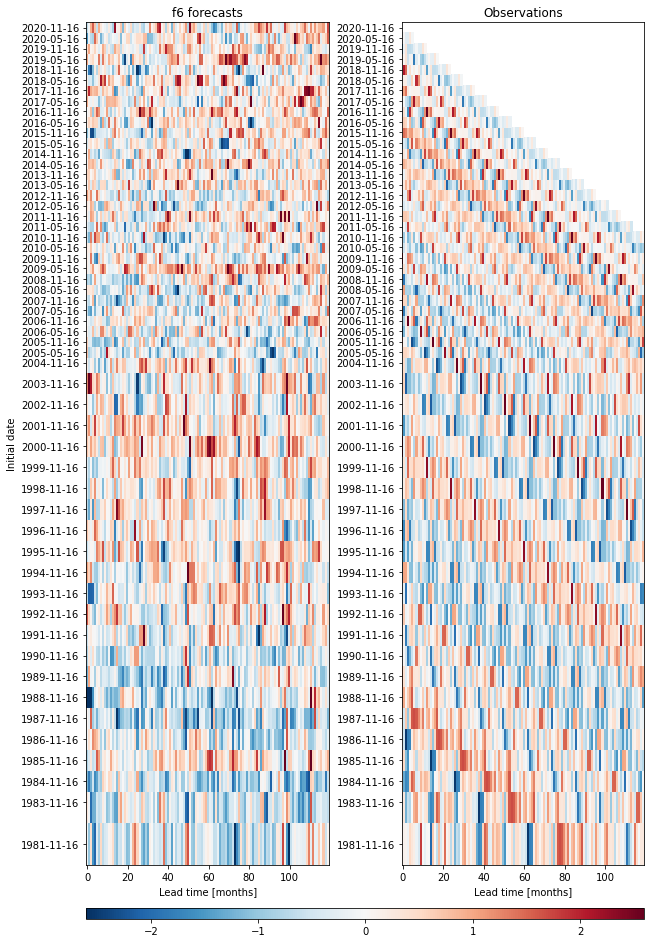

In [86]:
a, b = xr.align(obsv[VARIABLE], fcst[VARIABLE].isel(ensemble=0)) #mean('ensemble'))

if PERIOD is not None:
    a = my.mask_time_period(a, PERIOD)
    b = my.mask_time_period(b, PERIOD)
    
v = max(abs(a.min()), a.max())

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,15))

ax[0].pcolormesh(b.lead_time,
                 xr.coding.times.cftime_to_nptime(b.init_date),
                 b, shading ='nearest', cmap='RdBu_r', vmin=-v, vmax=v)
ax[0].set_yticks(list(xr.coding.times.cftime_to_nptime(b.init_date)));
ax[0].set_xlabel('Lead time [months]')
ax[0].set_ylabel('Initial date')
ax[0].set_title('f6 forecasts')

im = ax[1].pcolormesh(a.lead_time,
                 xr.coding.times.cftime_to_nptime(a.init_date),
                 a, shading ='nearest', cmap='RdBu_r', vmin=-v, vmax=v)
ax[1].set_yticks(list(xr.coding.times.cftime_to_nptime(b.init_date)))
ax[1].set_xlabel('Lead time [months]')
ax[1].set_title('Observations')

fig.subplots_adjust(wspace=0.3, bottom=0.1)
cbar_ax = fig.add_axes([0.125, 0.05, 0.775, 0.01])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal');